In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_datasets(filename, data_columns, target_column):
    df = pd.read_csv(filename)
    X, y = df[data_columns], df[target_column]
    return X, y

In [3]:
def split_datasets(X, y, test_size = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [4]:
def plot_data(A, b, test = False):
    positive_indices = np.where(b == 1)[0]
    negative_indices = np.where(b == 0)[0]
    
    plt.scatter(A.iloc[positive_indices, 0], A.iloc[positive_indices, 1], marker='x', c= 'yellow' if test else 'green')
    plt.scatter(A.iloc[negative_indices, 0], A.iloc[negative_indices, 1], marker='+', c= 'blue' if test else 'red')
    #plt.show()

In [5]:
def decision_boundary(X, y, mean, std, theta):
    X =(X-mean)/std
    positive_indices = np.where(y == 1)[0]
    negative_indices = np.where(y == 0)[0]
    
    plt.scatter(X.iloc[positive_indices, 0], X.iloc[positive_indices, 1], marker='x', c= 'green')
    plt.scatter(X.iloc[negative_indices, 0], X.iloc[negative_indices, 1], marker='+', c= 'red')
    
    #plt.show()

In [6]:
def normalize(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    X_new = (X - mean)/std
    return X_new, mean, std

In [7]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
def hypothesis(X, theta):
    h = sigmoid(np.dot(X, theta))
    return h

In [10]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    temp = hypothesis(X, theta)
    J = np.sum(-y*np.log(temp) + (1 - y)*np.log(1 - temp)) / m
    return J

In [11]:
def derivative_theta(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    d_theta = X.T.dot(hypothesis(X,theta) - y)/m
    return d_theta

In [12]:
def gradient_descent(X, y, theta, alpha = 0.01, eps = 0.00001, numiters = 1500, print_J = True):
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    i = 0
    while (True):
        theta = theta - alpha * derivative_theta(X, y, theta)
        J = cost_function(X, y, theta)
        J_history.append(J)
        i+=1
        if print_J == True:
            print(J)
        if (abs(J - J_history[-2]) < eps):
            break
        
    return theta, J_history

In [13]:
def predict(X, mean, std, theta):
    predictions = hypothesis(prepare_X((X-mean.values)/std.values),theta)
    return predictions

In [14]:
X, y = load_datasets('sats.csv', ["exam1", "exam2"], "submitted")
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(100, 2), y=(100,)


In [15]:
# Спробувати на цьому датасеті після написання всіх функцій і відлагодження на попередньому
X, y = load_datasets('tests.csv', ["test1", "test2"], "passed")
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(118, 2), y=(118,)


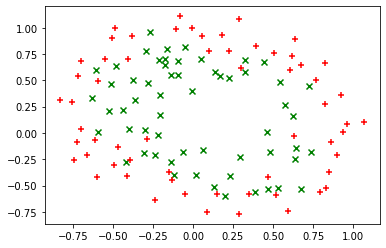

In [16]:
plot_data(X, y)

In [17]:
X_new, mean, std = normalize(X)

In [18]:
X_new = prepare_X(X_new)
y_new = y.to_numpy().reshape((X.shape[0], 1))

In [19]:
theta = np.zeros((X_new.shape[1], 1))

In [20]:
cost_function(X_new, y_new, theta)

-0.011748257297626198

In [21]:
new_theta, Js = gradient_descent(X_new, y_new, theta, 0.01, 1e-7, 1000000, False)
print(new_theta)

[[-0.03402965]
 [-0.14950957]
 [-0.00897109]]


In [22]:
cost_function(X_new, y_new, new_theta)

0.004046092397959407

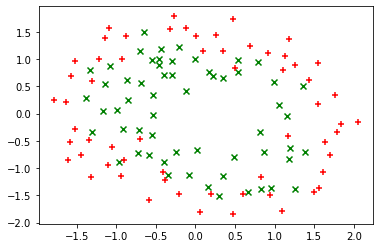

In [23]:
decision_boundary(X, y, mean, std, new_theta)

In [24]:
T = np.array([[40, 40], [60, 65]])
print(predict(T, mean, std, new_theta))

[[2.75975774e-06]
 [4.23420194e-09]]
